# Linear regression

In this notebook, I have tried to explain everything about linear regression.

## What we are gonna do

We are going to predict the weights of fish based on length, height, width and volume. We will start by predicting the weight using each of the attributes separately and finally we will use all the attributes together to predict the weights.

In [1]:
import pandas as pd

df = pd.read_csv("Fish.csv")

In [2]:
df.drop(df[df["Weight"] == 0].index, inplace=True)
df["Length"] = (df["Length1"] + df["Length2"] + df["Length3"]) / 3
df["Volume"] = df["Length"] * df["Height"] * df["Width"]

df.drop(["Length1", "Length2", "Length3"], axis=1,inplace=True)

df.head()

,Species,Weight,Height,Width,Length,Volume
0,Bream,242.0,11.5200,4.0200,26.200000,1213.332480
1,Bream,290.0,12.4800,4.3056,27.166667,1459.770624
2,Bream,340.0,12.3778,4.6961,27.166667,1579.127335
3,Bream,363.0,12.7300,4.4555,29.600000,1678.868044
4,Bream,430.0,12.4440,5.1340,29.833333,1905.976964


Splitting the attributes to use them seperately

In [4]:
x1 = df["Length"]
x2 = df["Height"]
x3 = df["Width"]
x4 = df["Volume"]

y = df["Weight"]

In [5]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.rcParams["figure.figsize"] = (20,10)

## How we are going to proceed

We use the [scikit learn](https://scikit-learn.org/stable/) module to define and train a linear regression model and get the predicted values and store them as p. 

The trained model is by itself a simple equation of a straight line of the form ``y = mx + b`` where x and y are the independent and dependent variables respectively. The goal is to find the slope ``m`` and the y-intercept ``b``. The correct slope and y-intecept values are the ones that produce a line which is closest to all the (x, y) points on a graph.

They can be found using the formulas:


## Length

In [6]:
x1 = pd.DataFrame(x1)

m1 = LinearRegression()
m1.fit(x1, y)
print(f"""
Slope: {m1.coef_}
y intercept: {m1.intercept_}""")
p1 = m1.predict(x1)


Slope: [30.57609909]
y intercept: -476.0673127029776


Mathematically calculating the slope and y-intercept
[Formula](https://imgur.com/a/4wmi1a1)

In [7]:
df1 = df.copy()
df1 = df1[["Weight", "Length"]]
df1.rename(columns={'Weight': 'Weight (y)', 'Length': 'Length (x)'}, inplace=True)
df1["xy"] = df1["Weight (y)"] * df1["Length (x)"]
df1["x**2"] = df1["Length (x)"] * df1["Length (x)"]
df1.head()

,Weight (y),Length (x),xy,x**2
0,242.0,26.200000,6340.400000,686.440000
1,290.0,27.166667,7878.333333,738.027778
2,340.0,27.166667,9236.666667,738.027778
3,363.0,29.600000,10744.800000,876.160000
4,430.0,29.833333,12828.333333,890.027778


In [8]:
n = len(df1["Weight (y)"])

m = ((n * sum(df1["xy"])) - (sum(df1["Length (x)"]) * sum(df1["Weight (y)"]))) / ((n * sum(df1["x**2"])) - (sum(df1["Length (x)"]) * sum(df1["Length (x)"])))

b = ((sum(df1["Weight (y)"]) * sum(df1["x**2"])) - (sum(df1["Length (x)"]) * sum(df1["xy"]))) / ((n * sum(df1["x**2"])) - (sum(df1["Length (x)"]) * sum(df1["Length (x)"])))

print(f"""
Slope: {m}
y intercept: {b}""")


Slope: 30.576099087935674
y intercept: -476.06731270298576


In [9]:
df1["y_plots"] = (df1["Length (x)"] * m) + b

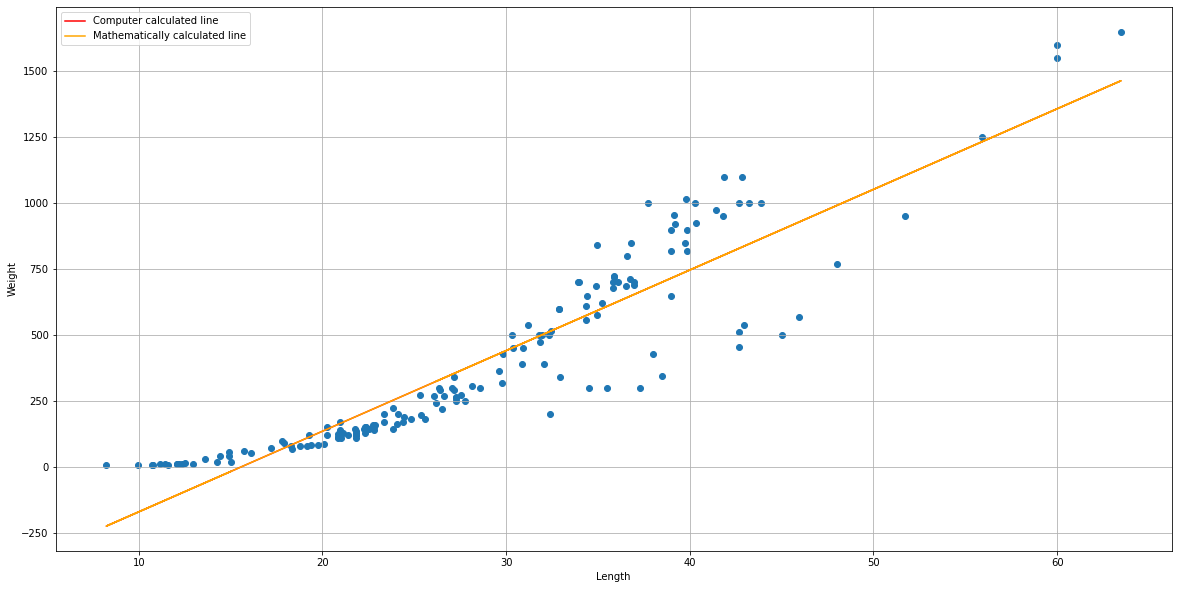

In [10]:
plt.scatter(x1, y)
plt.ylabel("Weight")
plt.xlabel("Length")
plt.plot(x1, p1, color="red", label="Computer calculated line")
plt.plot(df1["Length (x)"], df1["y_plots"] , color="orange", label="Mathematically calculated line")
plt.legend(loc="upper left")
plt.grid()
plt.show()

## Height

In [11]:
x2 = pd.DataFrame(x2)

m2 = LinearRegression()
m2.fit(x2, y)
print(f"""
Slope: {m2.coef_}
y intercept: {m2.intercept_}""")
p2 = m2.predict(x2)


Slope: [60.28187533]
y intercept: -140.89307841499794


Mathematically calculating the slope and y-intercept
[Formula](https://imgur.com/a/4wmi1a1)

In [12]:
df2 = df.copy()
df2 = df2[["Weight", "Height"]]
df2.rename(columns={'Weight': 'Weight (y)', 'Height': 'Height (x)'}, inplace=True)
df2["xy"] = df2["Weight (y)"] * df2["Height (x)"]
df2["x**2"] = df2["Height (x)"] * df2["Height (x)"]
df2.head()

,Weight (y),Height (x),xy,x**2
0,242.0,11.5200,2787.840,132.710400
1,290.0,12.4800,3619.200,155.750400
2,340.0,12.3778,4208.452,153.209933
3,363.0,12.7300,4620.990,162.052900
4,430.0,12.4440,5350.920,154.853136


In [13]:
n = len(df2["Weight (y)"])

m = ((n * sum(df2["xy"])) - (sum(df2["Height (x)"]) * sum(df2["Weight (y)"]))) / ((n * sum(df2["x**2"])) - (sum(df2["Height (x)"]) * sum(df2["Height (x)"])))

b = ((sum(df2["Weight (y)"]) * sum(df2["x**2"])) - (sum(df2["Height (x)"]) * sum(df2["xy"]))) / ((n * sum(df2["x**2"])) - (sum(df2["Height (x)"]) * sum(df2["Height (x)"])))

print(f"""
Slope: {m}
y intercept: {b}""")


Slope: 60.28187533035098
y intercept: -140.89307841499726


In [14]:
df2["y_plots"] = (df2["Height (x)"] * m) + b

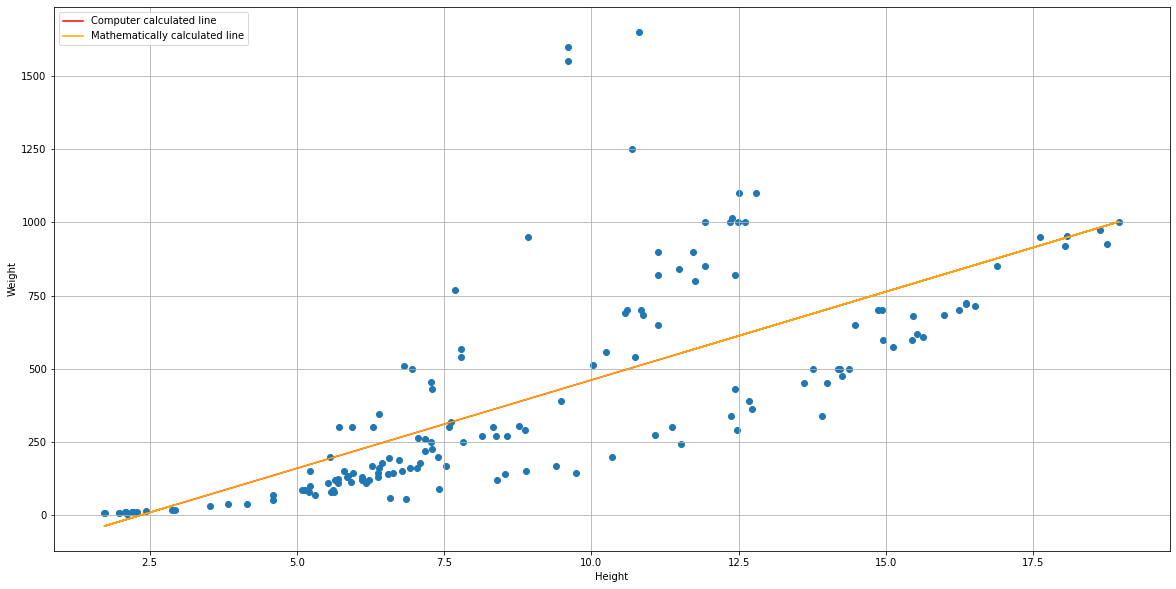

In [15]:
plt.scatter(x2, y)
plt.ylabel("Weight")
plt.xlabel("Height")
plt.plot(x2, p2, color="red", label="Computer calculated line")
plt.plot(df2["Height (x)"], df2["y_plots"] , color="orange", label="Mathematically calculated line")
plt.legend(loc="upper left")
plt.grid()
plt.show()

## Width

In [16]:
x3 = pd.DataFrame(x3)

m3 = LinearRegression()
m3.fit(x3, y)
print(f"""
Slope: {m3.coef_}
y intercept: {m3.intercept_}""")
p3 = m3.predict(x3)


Slope: [187.77514373]
y intercept: -429.9132647792899


Mathematically calculating the slope and y-intercept
[Formula](https://imgur.com/a/4wmi1a1)

In [17]:
df3 = df.copy()
df3 = df3[["Weight", "Width"]]
df3.rename(columns={'Weight': 'Weight (y)', 'Width': 'Width (x)'}, inplace=True)
df3["xy"] = df3["Weight (y)"] * df3["Width (x)"]
df3["x**2"] = df3["Width (x)"] * df3["Width (x)"]
df3.head()

,Weight (y),Width (x),xy,x**2
0,242.0,4.0200,972.8400,16.160400
1,290.0,4.3056,1248.6240,18.538191
2,340.0,4.6961,1596.6740,22.053355
3,363.0,4.4555,1617.3465,19.851480
4,430.0,5.1340,2207.6200,26.357956


In [18]:
n = len(df3["Weight (y)"])

m = ((n * sum(df3["xy"])) - (sum(df3["Width (x)"]) * sum(df3["Weight (y)"]))) / ((n * sum(df3["x**2"])) - (sum(df3["Width (x)"]) * sum(df3["Width (x)"])))

b = ((sum(df3["Weight (y)"]) * sum(df3["x**2"])) - (sum(df3["Width (x)"]) * sum(df3["xy"]))) / ((n * sum(df3["x**2"])) - (sum(df3["Width (x)"]) * sum(df3["Width (x)"])))

print(f"""
Slope: {m}
y intercept: {b}""")


Slope: 187.7751437282082
y intercept: -429.9132647792923


In [19]:
df2["y_plots"] = (df2["Height (x)"] * m) + b

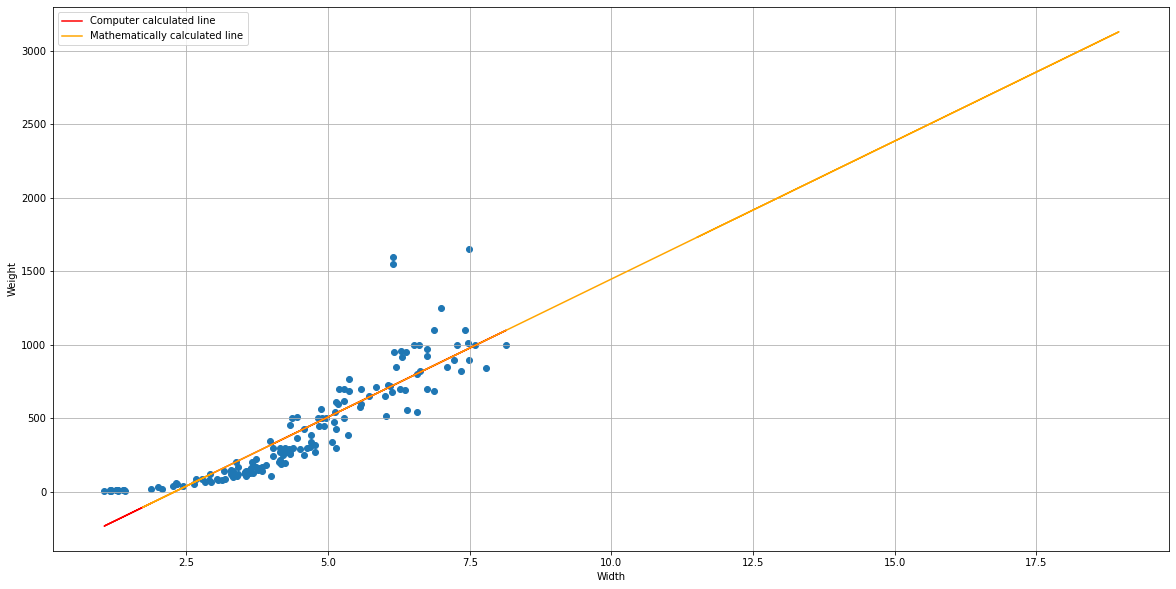

In [20]:
plt.scatter(x3, y)
plt.ylabel("Weight")
plt.xlabel("Width")
plt.plot(x3, p3, color="red", label="Computer calculated line")
plt.plot(df2["Height (x)"], df2["y_plots"] , color="orange", label="Mathematically calculated line")
plt.legend(loc="upper left")
plt.grid()
plt.show()

## Volume

In [21]:
x4 = pd.DataFrame(x4)

m4 = LinearRegression()
m4.fit(x4, y)
print(f"""
Slope: {m4.coef_}
y intercept: {m4.intercept_}""")
p4 = m4.predict(x4)


Slope: [0.242401]
y intercept: 22.097125552699026


Mathematically calculating the slope and y-intercept
[Formula](https://imgur.com/a/4wmi1a1)

In [22]:
df4 = df.copy()
df4 = df4[["Weight", "Volume"]]
df4.rename(columns={'Weight': 'Weight (y)', 'Volume': 'Volume (x)'}, inplace=True)
df4["xy"] = df4["Weight (y)"] * df4["Volume (x)"]
df4["x**2"] = df4["Volume (x)"] * df4["Volume (x)"]
df4.head()

,Weight (y),Volume (x),xy,x**2
0,242.0,1213.332480,293626.460160,1.472176e+06
1,290.0,1459.770624,423333.480960,2.130930e+06
2,340.0,1579.127335,536903.294044,2.493643e+06
3,363.0,1678.868044,609429.099972,2.818598e+06
4,430.0,1905.976964,819570.094520,3.632748e+06


In [23]:
n = len(df4["Weight (y)"])

m = ((n * sum(df4["xy"])) - (sum(df4["Volume (x)"]) * sum(df4["Weight (y)"]))) / ((n * sum(df4["x**2"])) - (sum(df4["Volume (x)"]) * sum(df4["Volume (x)"])))

b = ((sum(df4["Weight (y)"]) * sum(df4["x**2"])) - (sum(df4["Volume (x)"]) * sum(df4["xy"]))) / ((n * sum(df4["x**2"])) - (sum(df4["Volume (x)"]) * sum(df4["Volume (x)"])))

print(f"""
Slope: {m}
y intercept: {b}""")


Slope: 0.24240100046304547
y intercept: 22.09712555270013


In [24]:
df4["y_plots"] = (df4["Volume (x)"] * m) + b

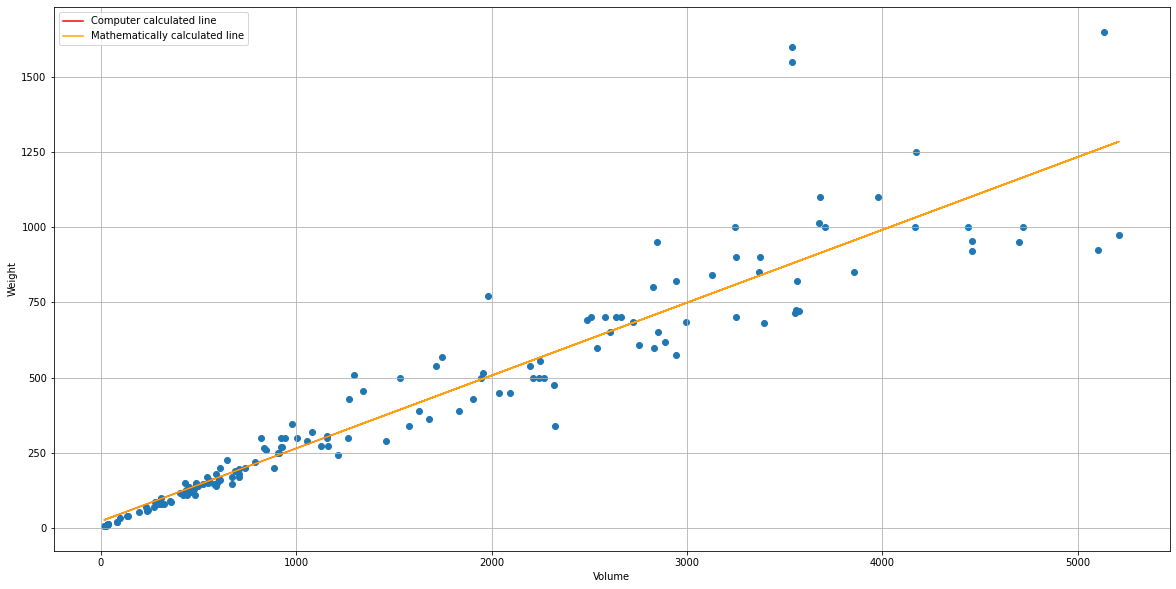

In [25]:
plt.scatter(x4, y)
plt.ylabel("Weight")
plt.xlabel("Volume")
plt.plot(x4, p4, color="red", label="Computer calculated line")
plt.plot(df4["Volume (x)"], df4["y_plots"] , color="orange", label="Mathematically calculated line")
plt.legend(loc="upper left")
plt.grid()
plt.show()

## Multi variable linear regression

In [26]:
x = df[["Length", "Height", "Width", "Volume"]]

m = LinearRegression()
m.fit(x, y)
print(f"""
Slope: {m.coef_}
y intercept: {m.intercept_}""")
p = m.predict(x)


Slope: [ 12.96845027 -22.22905676  -6.01250651   0.22430021]
y intercept: -95.1837630530934


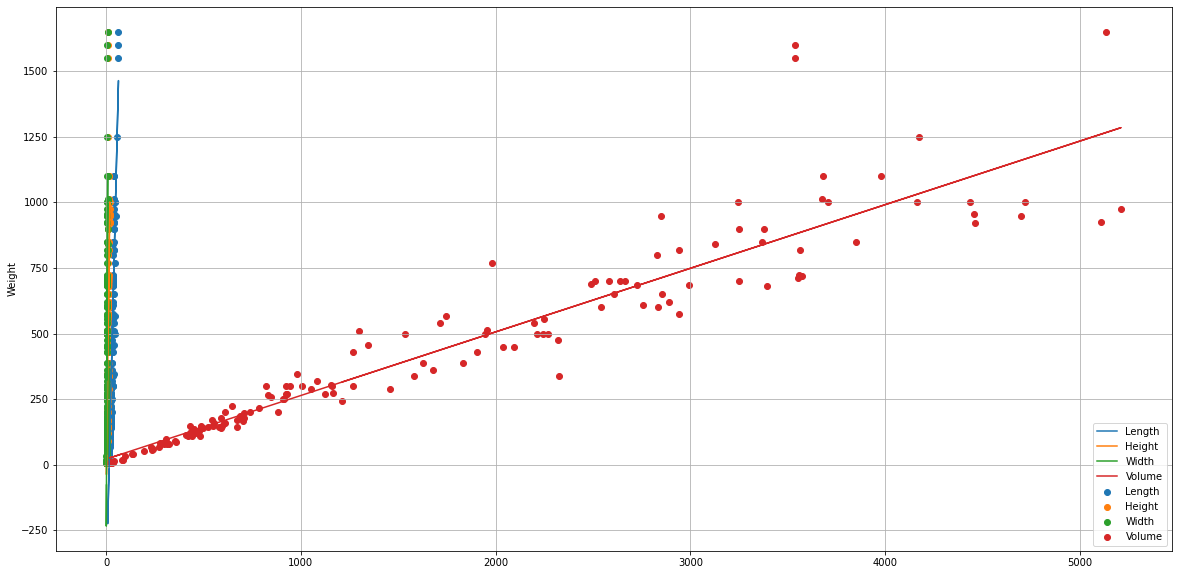

In [27]:
plt.scatter(x1, y, label="Length")
plt.scatter(x2, y, label="Height")
plt.scatter(x3, y, label="Width")
plt.scatter(x4, y, label="Volume")
plt.ylabel("Weight")
plt.plot(x1, p1, label="Length")
plt.plot(x2, p2, label="Height")
plt.plot(x3, p3, label="Width")
plt.plot(x4, p4, label="Volume")
plt.grid()
plt.legend()
plt.show()